# Assignment
1. Klik pada file lalu pilih `save a copy in drive` untuk file Format Task Assignment.ipynb ini
2. Download dataset : https://drive.google.com/drive/folders/1FyigllyrhI-sAsjbPaLfwV7REwLqe_xt?usp=sharing
3. Data ini hanya terdiri dari dua kolom: Jam dan Skor. Regresi linear sangat efektif digunakan untuk memprediksi skor siswa berdasarkan jumlah jam belajar.
4. Lakukan hal berikut :
- Import dataset
- Exploratory Data Analysis : statistical summary untuk mengetahui rata-rata, median, mean dkk, lalu lakukan scatter plot.
- lakukan analisis lainnya semisal correlation heatmap (opsional)
- feature engineering (check duplikat data dan drop duplikat, check missing value, check outlier
- splitting data ke X_train,X_test,y_train,y_test
- lakukan regresi modelling memakai linear regression, decision tree atau random forest (gunakan minimal 2 model)
- pada model linear regression keluarkan nilai intercept dan coef, namun pada decision tree dan random forest tidak bisa mengeluarkan nilai intercept dan coef karena libraries nya tidak support.
- Plotting the actual and predicted values pada tiap model
- Keluarkan nilai R-Score untuk membandingkan 2 model yang anda gunakan dan berikan kesimpulan model terbaik dengan melihat R-Score tertinggi.

In [1]:
from google.colab import drive
path_dataset = "/content/student_score.csv"

In [4]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('student_scores.csv')

### Exploratory Data Analysis (EDA)

In [5]:
# Statistical summary
print(df.describe())


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


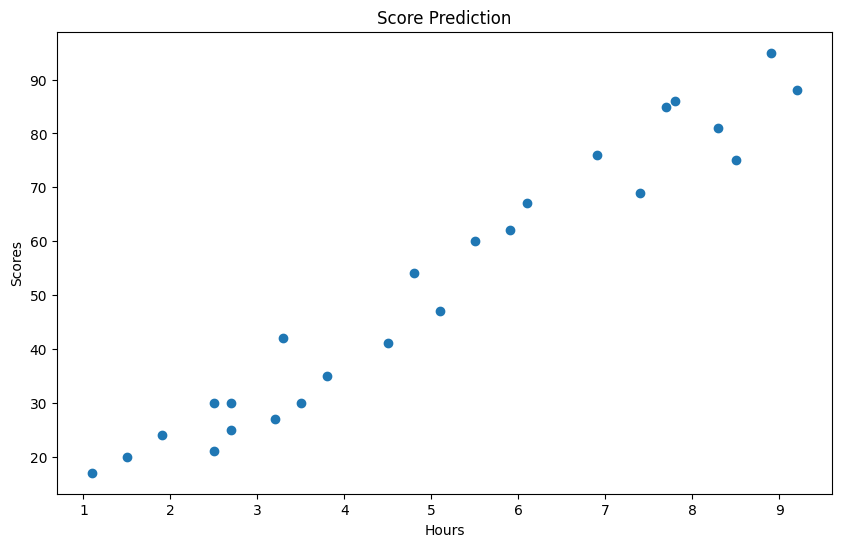

In [10]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'], df['Scores'])
plt.title('Score Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


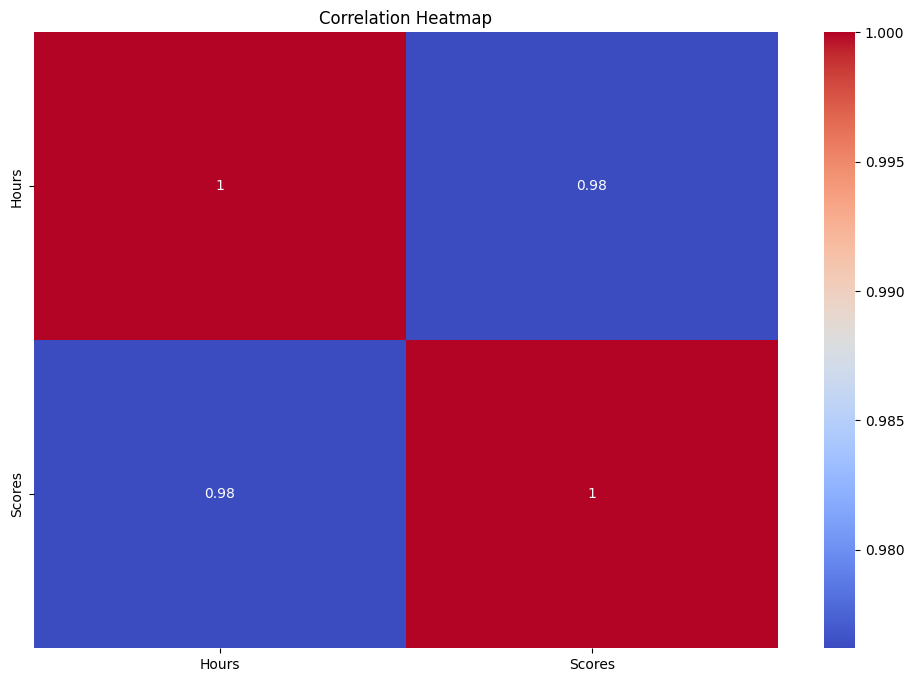

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



### Feature Engineering

Check and Drop Duplicated

In [17]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0


Check Missing Values

In [14]:
# Check missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Optionally, drop or fill missing values
# df = df.dropna()  # or df.fillna(method='ffill', inplace=True)



Missing values in each column:
Hours     0
Scores    0
dtype: int64


Check Outliers

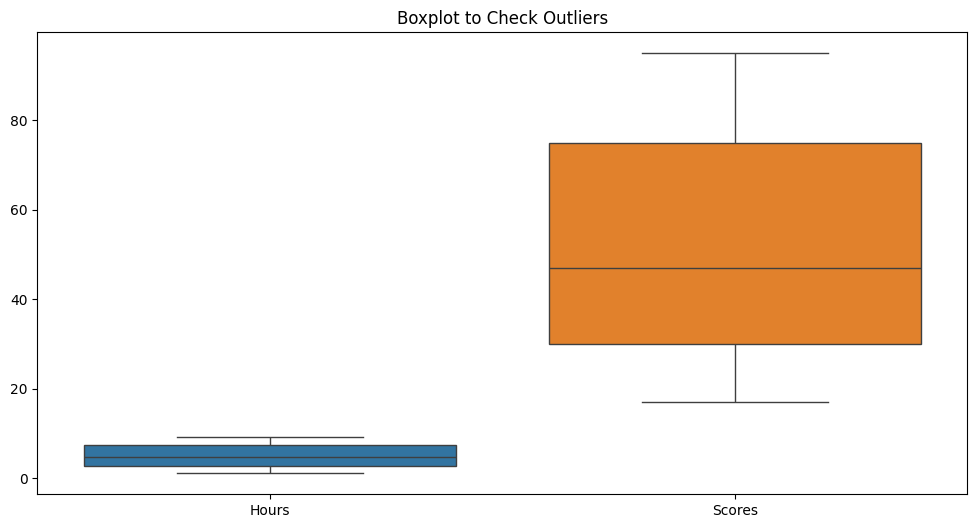

In [15]:
# Boxplot to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot to Check Outliers')
plt.show()


### Splitting Data

In [29]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('student_scores.csv')

# Menampilkan beberapa baris pertama dari data
print(data.head())

# Data jumlah jam belajar
X = data[['Hours']]  # Mengambil kolom 'Hours' sebagai fitur
X.head()

# Data skor siswa
y = data['Scores']  # Mengambil kolom 'Scores' sebagai target
y.head()

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


### Regression Modelling

Linear Regression

In [50]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Intercept and Coefficients
print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficients: {lr_model.coef_}")


Intercept: 2.826892353899737
Coefficients: [9.68207815]


Decision Tree Regressor

In [51]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

Random Forest Regressor

In [49]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

### Plotting Actual vs Predicted Values

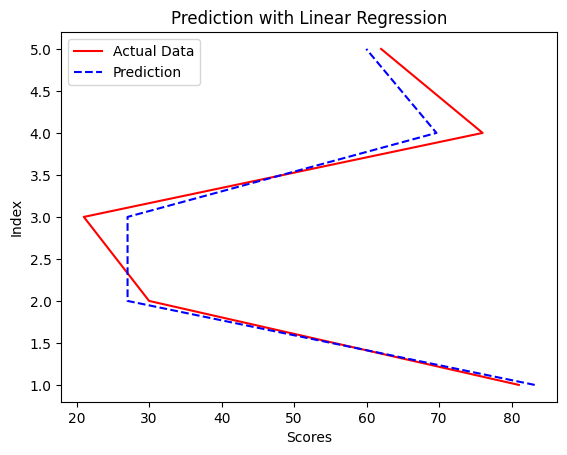

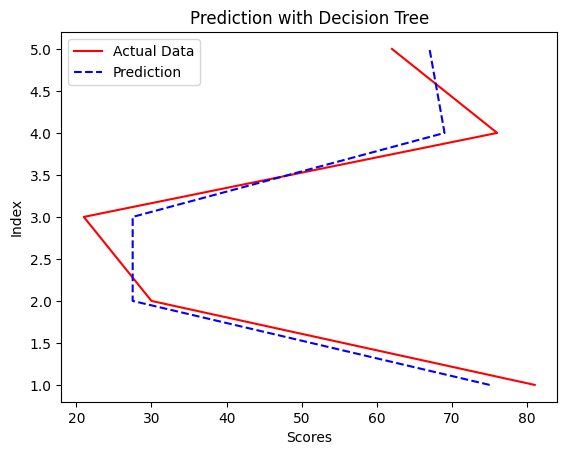

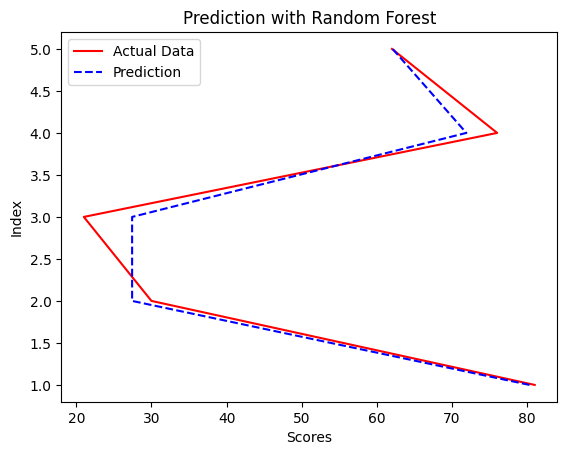

In [60]:
c = [i for i in range(1, len(y_test)+1, 1)]

# Linear Regression
plt.plot(y_test, c, color='r', linestyle='-', label='Actual Data')
plt.plot(y_pred_lr, c, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

# Decision Tree
plt.plot(y_test, c, color='r', linestyle='-', label='Actual Data')
plt.plot(y_pred_dt, c, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

# Random Forest
plt.plot(y_test, c, color='r', linestyle='-', label='Actual Data')
plt.plot(y_pred_rf, c, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()



### Calculate R-Squared Score

In [54]:
# R-Squared scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R-Squared Score for Linear Regression: {r2_lr}")
print(f"R-Squared Score for Decision Tree: {r2_dt}")
print(f"R-Squared Score for Random Forest: {r2_rf}")


R-Squared Score for Linear Regression: 0.9678055545167994
R-Squared Score for Decision Tree: 0.9461250849762066
R-Squared Score for Random Forest: 0.9778294466160586


### Conclusion

In [55]:
# Determine the best model based on R-Squared score
best_model = max([(r2_lr, 'Linear Regression'), (r2_dt, 'Decision Tree'), (r2_rf, 'Random Forest')], key=lambda x: x[0])
print(f"The best model is {best_model[1]} with an R-Squared score of {best_model[0]}")


The best model is Random Forest with an R-Squared score of 0.9778294466160586
